1.提出问题

影响租用共享单车人数的因素是什么？

本文暂只对可能的影响因素做分析，预测放在下篇文章中，因此只读入训练数据。

2.理解数据

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
print(plt.style.available)
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [16]:
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


train数据完整，数据类型都正确。

3.数据清洗

1）数据预处理

In [19]:
#此数据集不需要

2）特征工程

变量说明：

datatime    日期+时间

season      1=春 2=夏 3=秋 4=冬

holiday     1=节假日 0=非节假日

workingday   1=工作日 0=周末

weather     1=晴天多云 2=雾天阴天 3=小雪小雨 4=大雨大雪大雾

temp       气温摄氏度

atemp      体感温度

humidity    湿度

windspeed    风速

casual      非注册用户个数

registered   注册用户个数

count      给定日期时间（每小时）总租车人数

通常，很容易想到的影响因素有：月份，日期，时间，星期，季节，天气，温度，湿度，风速。下面逐个进行分析：

**1.月份，日期，时间，星期，季节，节假日，工作日**

因这几个变量意义较为相近，因此一同分析。

In [20]:
# 拆分年、月、日、时间、星期信息
periodDf = train[['datetime', 'count', 'season', 'holiday', 'workingday']]
periodDf.is_copy = None    # 避免Warning
periodDf['date'] = periodDf['datetime'].apply(lambda x: x.split()[0])
periodDf['year'] = periodDf['date'].apply(lambda x: x.split('-')[0])
periodDf['month'] = periodDf['date'].apply(lambda x: x.split('-')[1])
periodDf['day'] = periodDf['date'].apply(lambda x: x.split('-')[2])
periodDf['hour'] = periodDf['datetime'].apply(lambda x: x.split()[1].split(':')[0])
periodDf['weekday'] = periodDf['datetime'].apply(lambda x: pd.to_datetime(x).weekday())  # 0代表星期一
# periodDf.set_index('datetime', inplace=True)
# periodDf.index = pd.to_datetime(periodDf.index, format='%Y-%m-%d %H:%M:%S')
periodDf[:120:12]

,datetime,count,season,holiday,workingday,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,16,1,0,0,2011-01-01,2011,01,01,00,5
12,2011-01-01 12:00:00,84,1,0,0,2011-01-01,2011,01,01,12,5
24,2011-01-02 00:00:00,17,1,0,0,2011-01-02,2011,01,02,00,6
36,2011-01-02 13:00:00,75,1,0,0,2011-01-02,2011,01,02,13,6
48,2011-01-03 01:00:00,2,1,0,1,2011-01-03,2011,01,03,01,0
60,2011-01-03 15:00:00,72,1,0,1,2011-01-03,2011,01,03,15,0
72,2011-01-04 04:00:00,2,1,0,1,2011-01-04,2011,01,04,04,1
84,2011-01-04 16:00:00,83,1,0,1,2011-01-04,2011,01,04,16,1
96,2011-01-05 05:00:00,3,1,0,1,2011-01-05,2011,01,05,05,2
108,2011-01-05 17:00:00,190,1,0,1,2011-01-05,2011,01,05,17,2


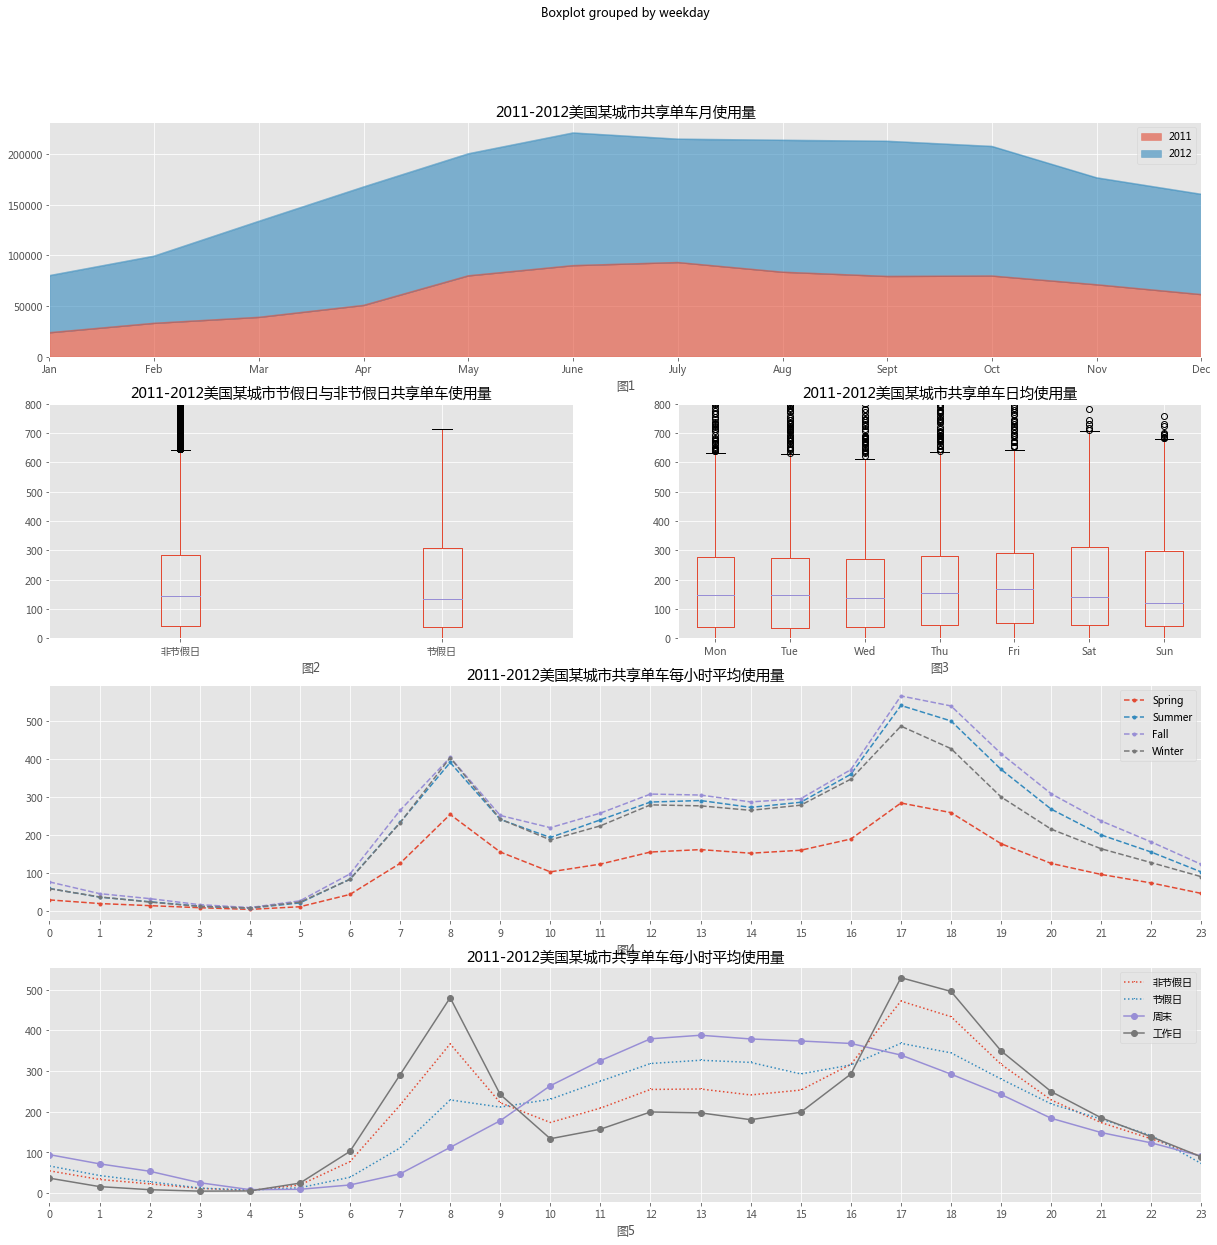

In [21]:
fig = plt.subplots(figsize=(20,20))

ax1 = plt.subplot2grid((4,2), (0,0), colspan=2)
df1 = periodDf.groupby(['month', 'year']).sum().unstack()['count']
df1.plot(kind='area', ax=ax1, alpha=0.6)
ax1.set_title('2011-2012美国某城市共享单车月使用量')
ax1.set_xlabel('图1')
ax1.set_xticks(list(range(12)))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
ax1.set_xlim(0,11)
ax1.legend(loc=0)

ax2 = plt.subplot2grid((4,2), (1,0))
df2 = periodDf[['count', 'holiday']]
df2.boxplot(by='holiday', ax=ax2)
ax2.set_title('2011-2012美国某城市节假日与非节假日共享单车使用量')
ax2.set_xlabel('图2')
ax2.set_xticklabels(['非节假日','节假日'], rotation='horizontal')
ax2.set_ylim(0,800)

ax3 = plt.subplot2grid((4,2), (1,1))
df3 = periodDf[['count', 'weekday']]
df3.boxplot(by='weekday', ax=ax3)
ax3.set_title('2011-2012美国某城市共享单车日均使用量')
ax3.set_xlabel('图3')
ax3.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
ax3.set_ylim(0,800)

ax4 = plt.subplot2grid((4,2), (2,0), colspan=2)
df4 = periodDf.groupby(['hour', 'season']).mean().unstack()['count']
df4.columns=['Spring','Summer','Fall','Winter']
df4.plot(ax=ax4, style='--.')
ax4.set_title('2011-2012美国某城市共享单车每小时平均使用量')
ax4.set_xlabel('图4')
ax4.set_xticks(list(range(24)))
ax4.set_xticklabels(list(range(24)))
ax4.set_xlim(0,23)
ax4.legend(loc=0)

ax4 = plt.subplot2grid((4,2), (3,0), colspan=2)
df41 = periodDf.groupby(['hour', 'holiday']).mean().unstack()['count'].rename(columns={0:'非节假日',1:'节假日'})
df42 = periodDf.groupby(['hour', 'workingday']).mean().unstack()['count'].rename(columns={0:'周末',1:'工作日'})
df41.plot(ax=ax4, style=':,')
df42.plot(ax=ax4, style='-o')
ax4.set_title('2011-2012美国某城市共享单车每小时平均使用量')
ax4.set_xlabel('图5')
ax4.set_xticks(list(range(24)))
ax4.set_xticklabels(list(range(24)))
ax4.set_xlim(0,23)
ax4.legend(loc=0)

图1可以看出2012年共享单车的使用量高于2011年，说明共享单车的推广效果卓有成效，消费人群增加了2倍左右。且这两年租车量随月份变化的趋势相同，说明时间是影响消费者租车的一个因素，具体来说，可能是气候因素，包括季节，温度，风速等，也可能是节日因素，例如某些月份节假日多。

图2说明节假日与非节假日的差别十分微小，从图5发现节假日与非节假日的两条曲线正好在工作日与非工作日围成的区域里，参考原始数据的定义，普通的周末并未被算作节假日。

仔细观察图3，发现五个工作日的租车情况大致相等，周末略微减少，结合图5来看，工作日与非工作日的租车需求完全相反，可以得出结论，上下班通勤租车的人数略多于周末出行租车的人。

图4显示出一天中的租车数量随时间的变化情况，早8点和晚17点达到两个高峰，很明显是上下班的人群租车，这个趋势在四季是相同的。同时可以发现，只有春季租车数量远少于其他三季。

**2.天气，温度，湿度，风速**

Text(0.5,0,'风速')

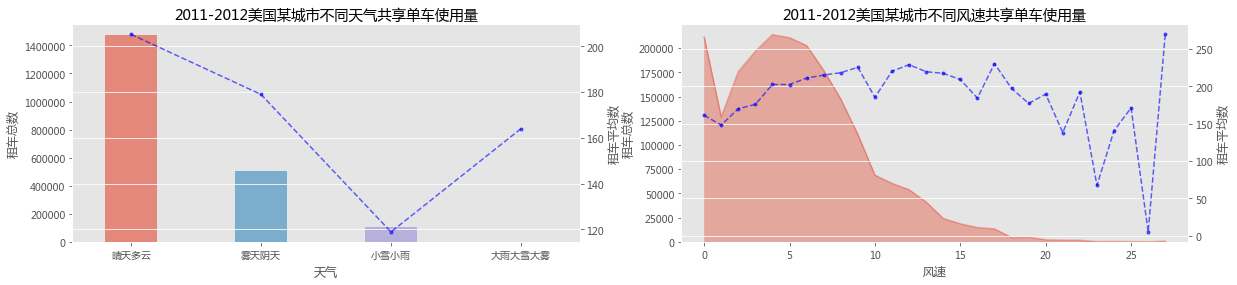

In [22]:
# 提取天气、温度、湿度、风速信息
climateDf = train[['count', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
climateDf = pd.concat([climateDf, periodDf['hour'].astype(int)], axis=1)

fig, axes = plt.subplots(1, 2, figsize=(20, 4))

ax1 = plt.subplot(1,2,1)
df11 = climateDf.groupby('weather').sum()['count']
df12 = climateDf.groupby('weather').mean()['count']
df1 = pd.concat([df11, df12], axis=1).reset_index()
df1.columns = ['weather', 'sum', 'mean']
df1['sum'].plot(kind='bar', width=0.4, ax=ax1, alpha=0.6, label='')
df1['mean'].plot(style='b--.', alpha=0.6, ax=ax1, secondary_y=True, label='平均值')
ax1.set_xlabel('天气')
ax1.set_xticks(df1.index)
ax1.set_xticklabels(['晴天多云','雾天阴天','小雪小雨','大雨大雪大雾'], rotation='horizontal')
ax1.set_ylabel('租车总数')
ax1.right_ax.set_ylabel('租车平均数')
ax1.set_title('2011-2012美国某城市不同天气共享单车使用量')

ax2 = plt.subplot(1,2,2)
df21 = climateDf.groupby('windspeed').sum()['count']
df22 = climateDf.groupby('windspeed').mean()['count']
df2 = pd.concat([df21, df22], axis=1).reset_index()
df2.columns = ['windspeed', 'sum', 'mean']
df2['sum'].plot(kind='area', ax=ax2, alpha=0.4, label='')
df2['mean'].plot(style='b--.', alpha=0.6, ax=ax2, secondary_y=True, label='平均值')
ax2.set_ylabel('租车总数')
ax2.right_ax.set_ylabel('租车平均数')
ax2.set_title('2011-2012美国某城市不同风速共享单车使用量')
ax2.set_xlabel('风速')

左图反映出天气状况对租车数量的影响，柱状图是租车总量，天气越好租车总量越多，但天气好的时候多毫无疑问也造成了这个结果。

折线图反映的是平均值，目的就是消除各种天气的天数不同的影响，然而反常的是大雨大雪大雾天气情况下租车数量的平均值竟然拔地而起，这一反常现象同样出现在右图中，当风速越高，租车总量趋近于0的时候，平均数反而最高，我们来查看一下原始数据：

In [23]:
train[train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [24]:
train[train['windspeed']>50]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.12,42,51.9987,0,5,5
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.97,16,50.0021,84,87,171
2755,2011-07-03 17:00:00,3,0,0,3,32.80,37.12,49,56.9969,181,177,358
2756,2011-07-03 18:00:00,3,0,0,3,32.80,37.12,49,56.9969,74,107,181


通过原始数据发现，这种极端天气情况出现的次数极少，所以才造成了这样的“异常值”出现。

Text(0,0.5,'数量')

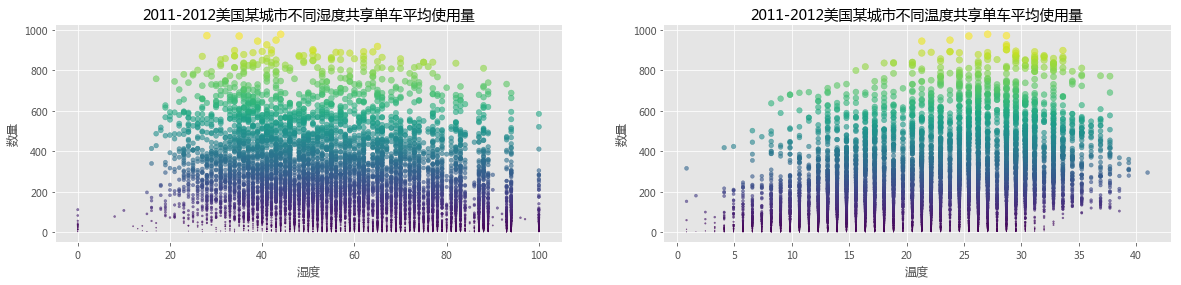

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

ax1 = plt.subplot(1,2,1)
df1 = climateDf[['humidity', 'count']]
ax1.scatter(df1['humidity'], df1['count'], s=df1['count']/5, c=df1['count'], marker='.', alpha=0.6)
ax1.set_title('2011-2012美国某城市不同湿度共享单车平均使用量')
ax1.set_xlabel('湿度')
ax1.set_ylabel('数量')

ax2 = plt.subplot(1,2,2)
df2 = climateDf[['temp', 'count']]
ax2.scatter(df2['temp'], df2['count'], s=df2['count']/5, c=df2['count'], marker='.', alpha=0.6)
ax2.set_title('2011-2012美国某城市不同温度共享单车平均使用量')
ax2.set_xlabel('温度')
ax2.set_ylabel('数量')

湿度和温度对租车数量的影响基本都呈线性关系，最适宜湿度为20，湿度越大租车越少，最适宜温度为30℃左右。

最后看看租车数量和其他变量之间相关性的大小：

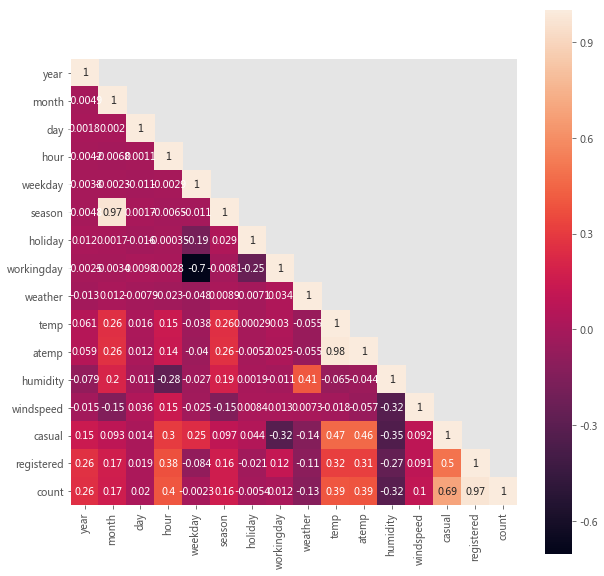

In [56]:
import seaborn as sns
import numpy as np

df = pd.concat([periodDf.iloc[:, -5:].astype(int), train.iloc[:, 1:]], axis=1)
corrdf = df.corr()
mask = np.array(corrdf)
mask[np.tril_indices_from(mask)] = False
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corrdf, mask=mask, annot=True, square=True)